C:\Users\91758\AppData\Local\Temp\ipykernel_12624\1101009022.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels, cmap=plt.cm.get_cmap("jet", 10))


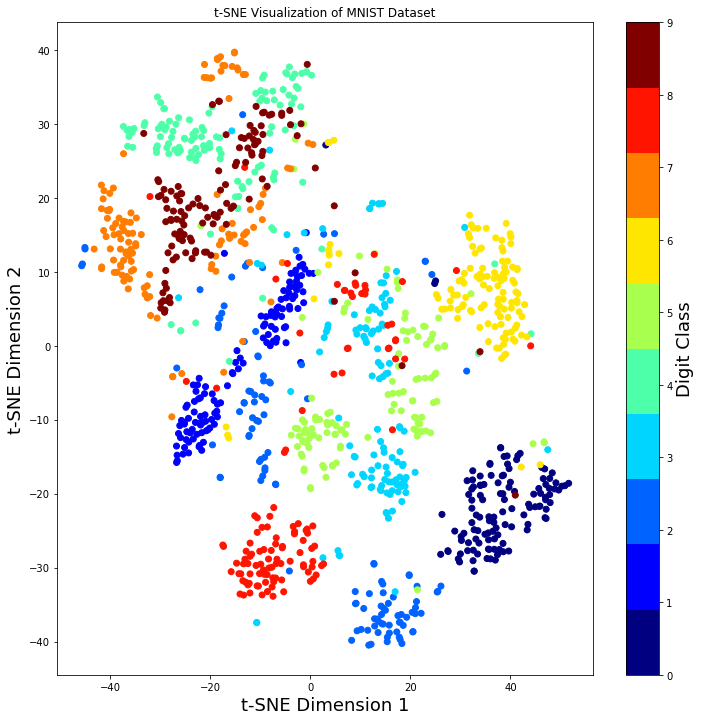

In [3]:
import tensorflow as tf
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()

# Choose only the first 120 images for each class
num_samples_per_class = 120
selected_indices = []
for class_label in range(10):
    class_indices = np.where(train_labels == class_label)[0][:num_samples_per_class]
    selected_indices.extend(class_indices)
    
selected_indices = np.array(selected_indices)
train_images = train_images[selected_indices]
train_labels = train_labels[selected_indices]

# Preprocess the data
image_width, image_height = 256, 256
train_images_resized = []
for image in train_images:
    image_resized = tf.image.resize(image[..., np.newaxis], (image_width, image_height))
    train_images_resized.append(image_resized.numpy().squeeze())

train_images_resized = np.array(train_images_resized)
train_images_flattened = train_images_resized.reshape(train_images_resized.shape[0], -1)

# Normalize the pixel values to the range [0, 1]
train_images_normalized = train_images_flattened.astype(np.float32) / 255.0

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
train_images_tsne = tsne.fit_transform(train_images_normalized)

# Create a scatter plot
# plt.figure(figsize=(12, 12))
# plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels, cmap=plt.cm.get_cmap("jet", 10))
# plt.colorbar(ticks=range(10))
# plt.title("t-SNE Visualization of MNIST Dataset")
# plt.show()
plt.figure(figsize=(12, 12))
scatter = plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels, cmap=plt.cm.get_cmap("jet", 10))
colorbar = plt.colorbar(scatter, ticks=range(10), label='Digit Class')
colorbar.ax.yaxis.label.set_fontsize(18)  # Set font size for colorbar label
plt.title("t-SNE Visualization of MNIST Dataset")
plt.xlabel("t-SNE Dimension 1",fontsize=18)
plt.ylabel("t-SNE Dimension 2",fontsize=18)
plt.show()
